In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [43]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Visualization

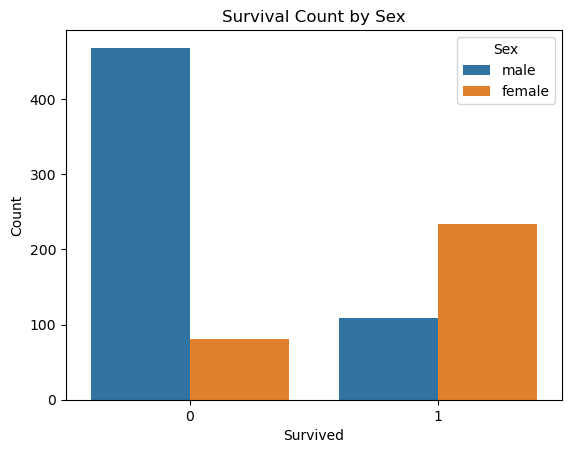

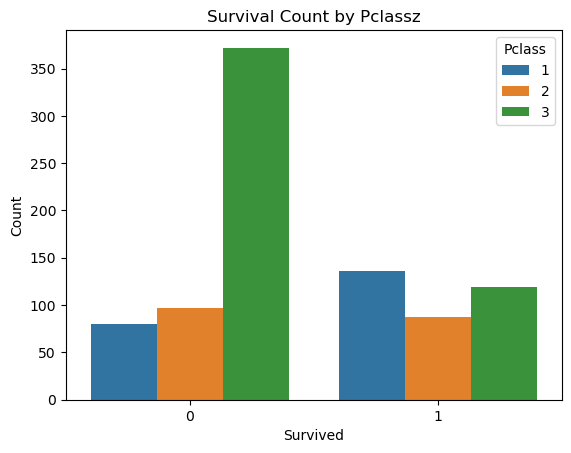

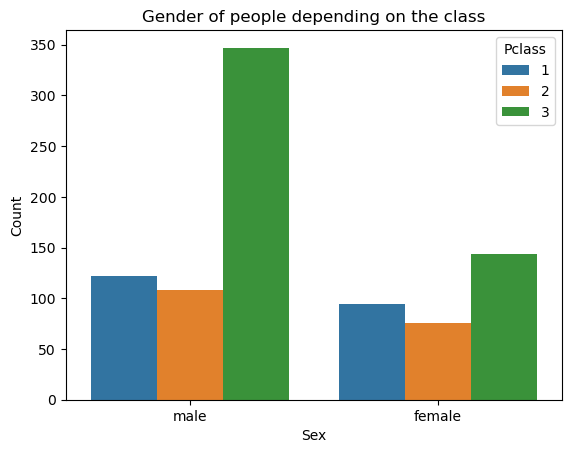

In [19]:
sns.countplot(x=train['Survived'], hue=train['Sex'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.show()

sns.countplot(x=train['Survived'], hue=train['Pclass'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Pclassz')
plt.show()

sns.countplot(x=train['Sex'], hue=train['Pclass'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender of people depending on the class')
plt.show()

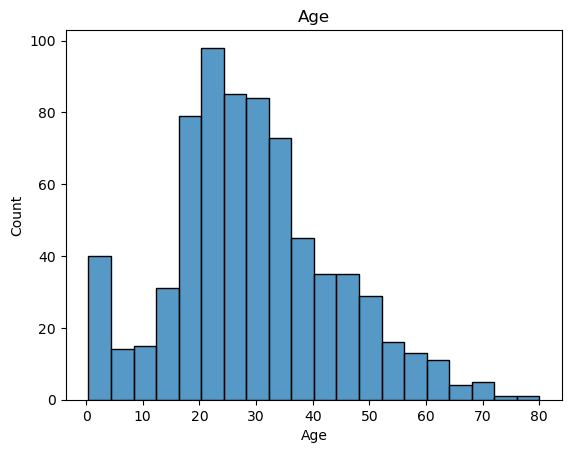

In [42]:
sns.histplot(x=train['Age']);
plt.title("Age");

<font size="3">Correlation between variables.</font>

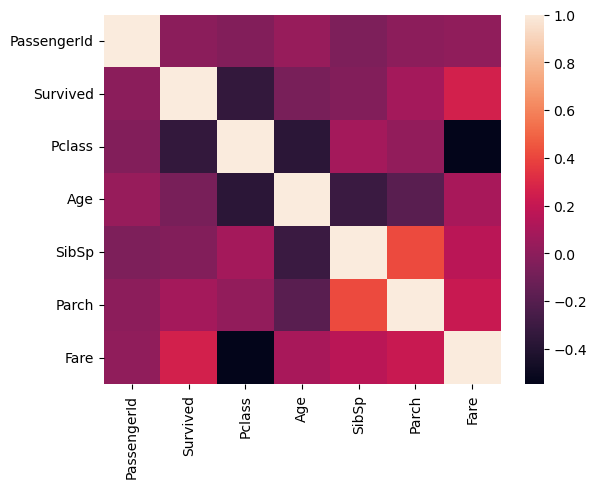

In [23]:
sns.heatmap(train.corr());

## Data preparation

In [44]:
def DropFeatures(X):
    return X.drop(['PassengerId','Survived','Name','Ticket','Cabin', 'N', "Sex", "Embarked"], axis=1, errors="ignore")

def FeatureEncoder(X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ["C", "S", "Q", "N"]

    for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()  
    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

    return X

In [45]:
train_data = FeatureEncoder(train)
X = DropFeatures(train_data)
y = train['Survived']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   C       891 non-null    float64
 6   S       891 non-null    float64
 7   Q       891 non-null    float64
 8   Female  891 non-null    float64
 9   Male    891 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


In [47]:
X['Age'] = X['Age'].fillna(X.Age.median())

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y.to_numpy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=.3, random_state=17) 

## Model Training

In [50]:
clf = RandomForestClassifier(random_state=17)

params = {
    'n_estimators':[10, 100, 200, 500, 600],
    'max_depth':[None, 5, 10],
    "min_samples_split": [2, 3 ,4],
}

search = GridSearchCV(clf, params, cv=3, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500, 600]},
             scoring='accuracy')

In [51]:
best_model = search.best_estimator_

In [52]:
best_model.score(X_test, y_test)

0.8022388059701493

## Prediction

In [53]:
test_data = FeatureEncoder(test)
X_test_set = DropFeatures(test_data)

In [54]:
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     332 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   C       418 non-null    float64
 6   S       418 non-null    float64
 7   Q       418 non-null    float64
 8   Female  418 non-null    float64
 9   Male    418 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 32.8 KB


In [55]:
X_test_set.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [56]:
X_test_set['Age'] = X_test_set['Age'].fillna(X_test_set.Age.median())
X_test_set['Fare'] = X_test_set['Fare'].fillna(X_test_set.Fare.mean())

In [57]:
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_test_set)

In [58]:
pred = best_model.predict(X_data_final_test)

In [59]:
df_pred = pd.DataFrame(test['PassengerId'])
df_pred['Survived'] = pred 
df_pred.to_csv("predictions/Titanic prediction.csv", index=False)

## Result

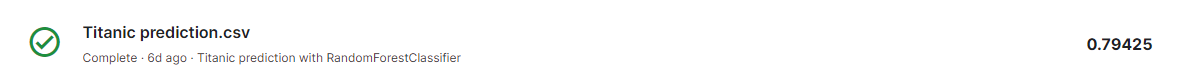

<font size="4">I claimed the 679th spot out of 14872.</font>

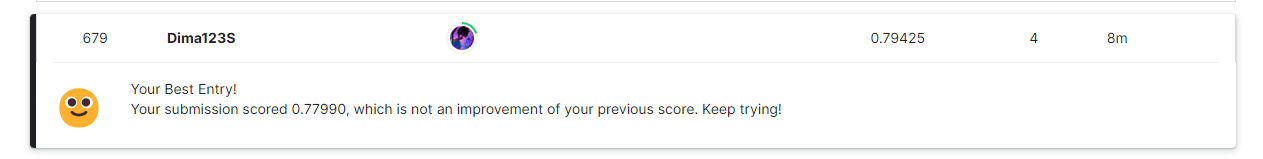